# Imports

In [48]:
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Data Preprocessing

## Vlad's 1st experiment

In [25]:
X_train = pd.read_csv("train_data/EDA_vlad_1_results.csv")
# Take segments id 19 to 58
X_train = X_train[380:1180]
X_train.head()

,Time rel [s],Day rel [d],Time rel [hh:mm:ss],Date abs [yyyy-mm-dd],Time abs [hh:mm:ss],ActivityClass [],Altitude [m],BodyPosition [],EdaArousalMean [],EdaSclMean [uS],...,InclinationRight [deg],MovementAcceleration [g],NonWearTime [],StepCount [steps],TempMean [],VerticalSpeed [m/s],temp [Grad Celsius],Markers,Segment id,Unnamed: 26
380,380,0,00:06:20,2023-07-11,16:56:57,2.0,97.714295,5.0,0.023156,8.349160,...,42.645281,0.004673,0.0,0.0,29.0,-0.006225,29.0,NaN,19.0,NaN
381,381,0,00:06:21,2023-07-11,16:56:58,2.0,97.702249,5.0,0.018034,8.298571,...,42.645281,0.004744,0.0,0.0,29.0,-0.006348,29.0,NaN,19.0,NaN
382,382,0,00:06:22,2023-07-11,16:56:59,2.0,97.684459,5.0,0.014045,8.253473,...,42.645281,0.003056,0.0,0.0,29.0,-0.006390,29.0,NaN,19.0,NaN
383,383,0,00:06:23,2023-07-11,16:57:00,2.0,97.664046,5.0,0.010938,8.215360,...,42.645281,0.003090,0.0,0.0,29.0,-0.006052,29.0,NaN,19.0,NaN
384,384,0,00:06:24,2023-07-11,16:57:01,2.0,97.645544,5.0,0.008519,8.187131,...,42.405239,0.005561,0.0,0.0,29.0,-0.005315,29.0,NaN,19.0,NaN


In [26]:
Y_train = pd.read_csv("train_data/EDA_vlad_1.csv")
# Take segments id 19 to 58
Y_train = Y_train[19:59]
Y_train

,Segment id,label
19,19,no
20,20,no
21,21,no
22,22,no
23,23,no
24,24,no
25,25,no
26,26,no
27,27,no
28,28,no


In [27]:
# Select the desired columns
selected_columns = ['Segment id', 'EdaArousalMean []']
df = pd.DataFrame(X_train)
X_data = df[selected_columns]
X_data

,Segment id,EdaArousalMean []
380,19.0,2.315570e-02
381,19.0,1.803368e-02
382,19.0,1.404464e-02
383,19.0,1.093798e-02
384,19.0,8.518505e-03
...,...,...
1175,58.0,7.216300e-16
1176,58.0,5.620060e-16
1177,58.0,4.376910e-16
1178,58.0,3.408740e-16


### Encoding the labels

In [28]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(Y_train.label)
encoded_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
Y_train["encoded_label"] = encoded_labels
Y_train

,Segment id,label,encoded_label
19,19,no,0
20,20,no,0
21,21,no,0
22,22,no,0
23,23,no,0
24,24,no,0
25,25,no,0
26,26,no,0
27,27,no,0
28,28,no,0


### Organaize data

In [30]:
# Merge the data and labels based on the 'series_id' column
merged_data = pd.merge(X_data, Y_train, on='Segment id')
merged_data

,Segment id,EdaArousalMean [],label,encoded_label
0,19.0,2.315570e-02,no,0
1,19.0,1.803368e-02,no,0
2,19.0,1.404464e-02,no,0
3,19.0,1.093798e-02,no,0
4,19.0,8.518505e-03,no,0
...,...,...,...,...
795,58.0,7.216300e-16,no,0
796,58.0,5.620060e-16,no,0
797,58.0,4.376910e-16,no,0
798,58.0,3.408740e-16,no,0


In [31]:
# Extract the measuremens columns as time series data
X_custom = merged_data.groupby('Segment id')['EdaArousalMean []'].apply(list).values
X_custom

array([list([0.023155699, 0.018033676, 0.014044641, 0.010937978, 0.008518505, 0.006634219, 0.005166735, 0.004023857, 0.003133783, 0.002440593, 0.001900735, 0.001480294, 0.001152854, 0.000897844, 0.000699242, 0.00054457, 0.000424111, 0.000330298, 0.000257237, 0.000200336]),
       list([0.000156022, 0.00012151, 9.4632e-05, 7.36995e-05, 5.73972e-05, 4.4701e-05, 3.48132e-05, 2.71125e-05, 2.11153e-05, 1.64446e-05, 1.28071e-05, 9.97414e-06, 7.76787e-06, 6.04962e-06, 4.71145e-06, 3.66928e-06, 2.85764e-06, 2.22553e-06, 1.73325e-06, 1.34985e-06]),
       list([1.05127e-06, 8.18728e-07, 6.37626e-07, 4.96583e-07, 3.8674e-07, 3.01193e-07, 2.34569e-07, 1.82683e-07, 1.42274e-07, 1.10803e-07, 8.62933e-08, 6.72053e-08, 5.23395e-08, 0.015763245, 0.303056237, 0.245865009, 0.191479862, 0.149124666, 0.116138407, 0.090448682]),
       list([0.070441505, 0.054859899, 0.042724932, 0.033274211, 0.113932717, 0.128482878, 0.100062566, 0.077928805, 0.146857909, 0.166194591, 0.129432478, 0.150949921, 0.158337828

In [32]:
Y_custom = Y_train["encoded_label"].values
Y_custom

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Vlad's 2nd experiment

In [33]:
X_train1 = pd.read_csv("train_data/EDA_vlad_2_results.csv")
# Take segments 3 to 43
X_train1 = X_train1[60:880]
X_train1.head()

,Time rel [s],Day rel [d],Time rel [hh:mm:ss],Date abs [yyyy-mm-dd],Time abs [hh:mm:ss],ActivityClass [],Altitude [m],BodyPosition [],EdaArousalMean [],EdaSclMean [uS],...,InclinationForward [deg],InclinationRight [deg],MovementAcceleration [g],NonWearTime [],StepCount [steps],TempMean [],VerticalSpeed [m/s],temp [Grad Celsius],Marker,Segment id
60,60,0,00:01:00,2023-07-11,17:26:01,2,100.536476,5,0.427687,9.062784,...,87.766423,37.166398,0.227796,0,1,27.7,-0.020075,27.7,NaN,3
61,61,0,00:01:01,2023-07-11,17:26:02,2,100.509342,5,0.333083,9.143783,...,87.766423,37.166398,0.278153,0,2,27.7,-0.017381,27.7,NaN,3
62,62,0,00:01:02,2023-07-11,17:26:03,2,100.458276,5,0.259405,9.148984,...,87.766423,37.166398,0.210692,0,0,27.7,-0.013896,27.7,Mark - Start,3
63,63,0,00:01:03,2023-07-11,17:26:04,2,100.394854,5,0.202025,9.050531,...,87.766423,37.166398,0.304300,0,1,27.7,-0.010250,27.7,NaN,3
64,64,0,00:01:04,2023-07-11,17:26:05,2,100.343395,5,0.497035,8.671568,...,107.638195,42.669686,0.224496,0,0,27.7,-0.006618,27.7,NaN,3


In [34]:
Y_train1 = pd.read_csv("train_data/EDA_vlad_2.csv")
# Take segments 3 to 43
Y_train1 = Y_train1[3:44]
Y_train1

,Segment id,label
3,3,no
4,4,no
5,5,no
6,6,no
7,7,no
8,8,no
9,9,no
10,10,no
11,11,no
12,12,no


In [35]:
# Select the desired columns
selected_columns1 = ['Segment id', 'EdaArousalMean []']
df1 = pd.DataFrame(X_train1)
X_data1 = df1[selected_columns1]
X_data1

,Segment id,EdaArousalMean []
60,3,0.427687
61,3,0.333083
62,3,0.259405
63,3,0.202025
64,3,0.497035
...,...,...
875,43,0.001763
876,43,0.001373
877,43,0.001069
878,43,0.000833


### Encoding the labels

In [36]:
encoded_labels1 = label_encoder.fit_transform(Y_train1.label)
encoded_labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [37]:
Y_train1["encoded_label"] = encoded_labels1
Y_train1

,Segment id,label,encoded_label
3,3,no,0
4,4,no,0
5,5,no,0
6,6,no,0
7,7,no,0
8,8,no,0
9,9,no,0
10,10,no,0
11,11,no,0
12,12,no,0


### Organaize data

In [38]:
# Merge the data and labels based on the 'series_id' column
merged_data1 = pd.merge(X_data1, Y_train1, on='Segment id')
merged_data1

,Segment id,EdaArousalMean [],label,encoded_label
0,3,0.427687,no,0
1,3,0.333083,no,0
2,3,0.259405,no,0
3,3,0.202025,no,0
4,3,0.497035,no,0
...,...,...,...,...
815,43,0.001763,no,0
816,43,0.001373,no,0
817,43,0.001069,no,0
818,43,0.000833,no,0


In [39]:
# Extract the measuremens columns as time series data
X_custom1 = merged_data1.groupby('Segment id')['EdaArousalMean []'].apply(list).values
X_custom1

array([list([0.427687084, 0.333083036, 0.259405329, 0.202025074, 0.497034597, 0.68164958, 0.530869227, 0.413441369, 0.321988462, 0.250764867, 0.195295874, 0.15209658, 0.118452936, 0.092251239, 0.071845337, 0.055953205, 0.0435764, 0.033937334, 0.026430422, 0.020584034]),
       list([0.016030862, 0.012484848, 0.009723209, 0.007572443, 0.005897424, 0.004592919, 0.003576969, 0.002785746, 0.002169541, 0.00168964, 0.001315893, 0.001024819, 0.00079813, 0.000621584, 0.00048409, 0.00037701, 0.000293615, 0.000228668, 0.000178087, 0.000138694]),
       list([0.000108015, 8.41222e-05, 6.55145e-05, 5.10227e-05, 3.97365e-05, 3.09468e-05, 2.41014e-05, 1.87702e-05, 0.862759539, 1.17398173, 0.91429789, 0.712055913, 0.554549703, 0.431883743, 0.336351397, 0.400195271, 0.34363915, 0.267626439, 0.208427681, 0.162323641]),
       list([0.126417779, 0.098454265, 0.076676259, 0.05971553, 0.046506502, 0.095802942, 0.150189563, 0.116967749, 0.196725346, 0.202430142, 0.157652753, 0.122780087, 0.095621228, 0.074

In [40]:
# Extract the 'label' column as labels
Y_custom1 = Y_train1["encoded_label"].values
Y_custom1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

## Organaize data for training

### Merge Vlad's 1st and 2nd experiments data

In [41]:
# Merge Vlad's 1st and 2nd experiments X data
merged_X1 = np.concatenate((X_custom, X_custom1), axis=0)
merged_X1

array([list([0.023155699, 0.018033676, 0.014044641, 0.010937978, 0.008518505, 0.006634219, 0.005166735, 0.004023857, 0.003133783, 0.002440593, 0.001900735, 0.001480294, 0.001152854, 0.000897844, 0.000699242, 0.00054457, 0.000424111, 0.000330298, 0.000257237, 0.000200336]),
       list([0.000156022, 0.00012151, 9.4632e-05, 7.36995e-05, 5.73972e-05, 4.4701e-05, 3.48132e-05, 2.71125e-05, 2.11153e-05, 1.64446e-05, 1.28071e-05, 9.97414e-06, 7.76787e-06, 6.04962e-06, 4.71145e-06, 3.66928e-06, 2.85764e-06, 2.22553e-06, 1.73325e-06, 1.34985e-06]),
       list([1.05127e-06, 8.18728e-07, 6.37626e-07, 4.96583e-07, 3.8674e-07, 3.01193e-07, 2.34569e-07, 1.82683e-07, 1.42274e-07, 1.10803e-07, 8.62933e-08, 6.72053e-08, 5.23395e-08, 0.015763245, 0.303056237, 0.245865009, 0.191479862, 0.149124666, 0.116138407, 0.090448682]),
       list([0.070441505, 0.054859899, 0.042724932, 0.033274211, 0.113932717, 0.128482878, 0.100062566, 0.077928805, 0.146857909, 0.166194591, 0.129432478, 0.150949921, 0.158337828

In [42]:
# Merge Vlad's 1st and 2nd experiments Y data
merged_Y1 = np.concatenate((Y_custom, Y_custom1), axis=0)
merged_Y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [43]:
# Convert the merged X values to a 2D NumPy array
X_custom_np1 = np.vstack(merged_X1)
X_custom_np1

array([[2.31556990e-02, 1.80336760e-02, 1.40446410e-02, ...,
        3.30298000e-04, 2.57237000e-04, 2.00336000e-04],
       [1.56022000e-04, 1.21510000e-04, 9.46320000e-05, ...,
        2.22553000e-06, 1.73325000e-06, 1.34985000e-06],
       [1.05127000e-06, 8.18728000e-07, 6.37626000e-07, ...,
        1.49124666e-01, 1.16138407e-01, 9.04486820e-02],
       ...,
       [2.85493000e-04, 2.22343000e-04, 1.73161000e-04, ...,
        4.07235000e-06, 3.17155000e-06, 2.47000000e-06],
       [1.92364000e-06, 1.49813000e-06, 1.16675000e-06, ...,
        1.58676351e-01, 1.23577266e-01, 9.62420720e-02],
       [7.49534010e-02, 5.83737670e-02, 4.54615360e-02, ...,
        1.06915300e-03, 8.32657000e-04, 6.48474000e-04]])

### Segment labels

In [44]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
plt.rcParams["figure.figsize"] = 16, 10

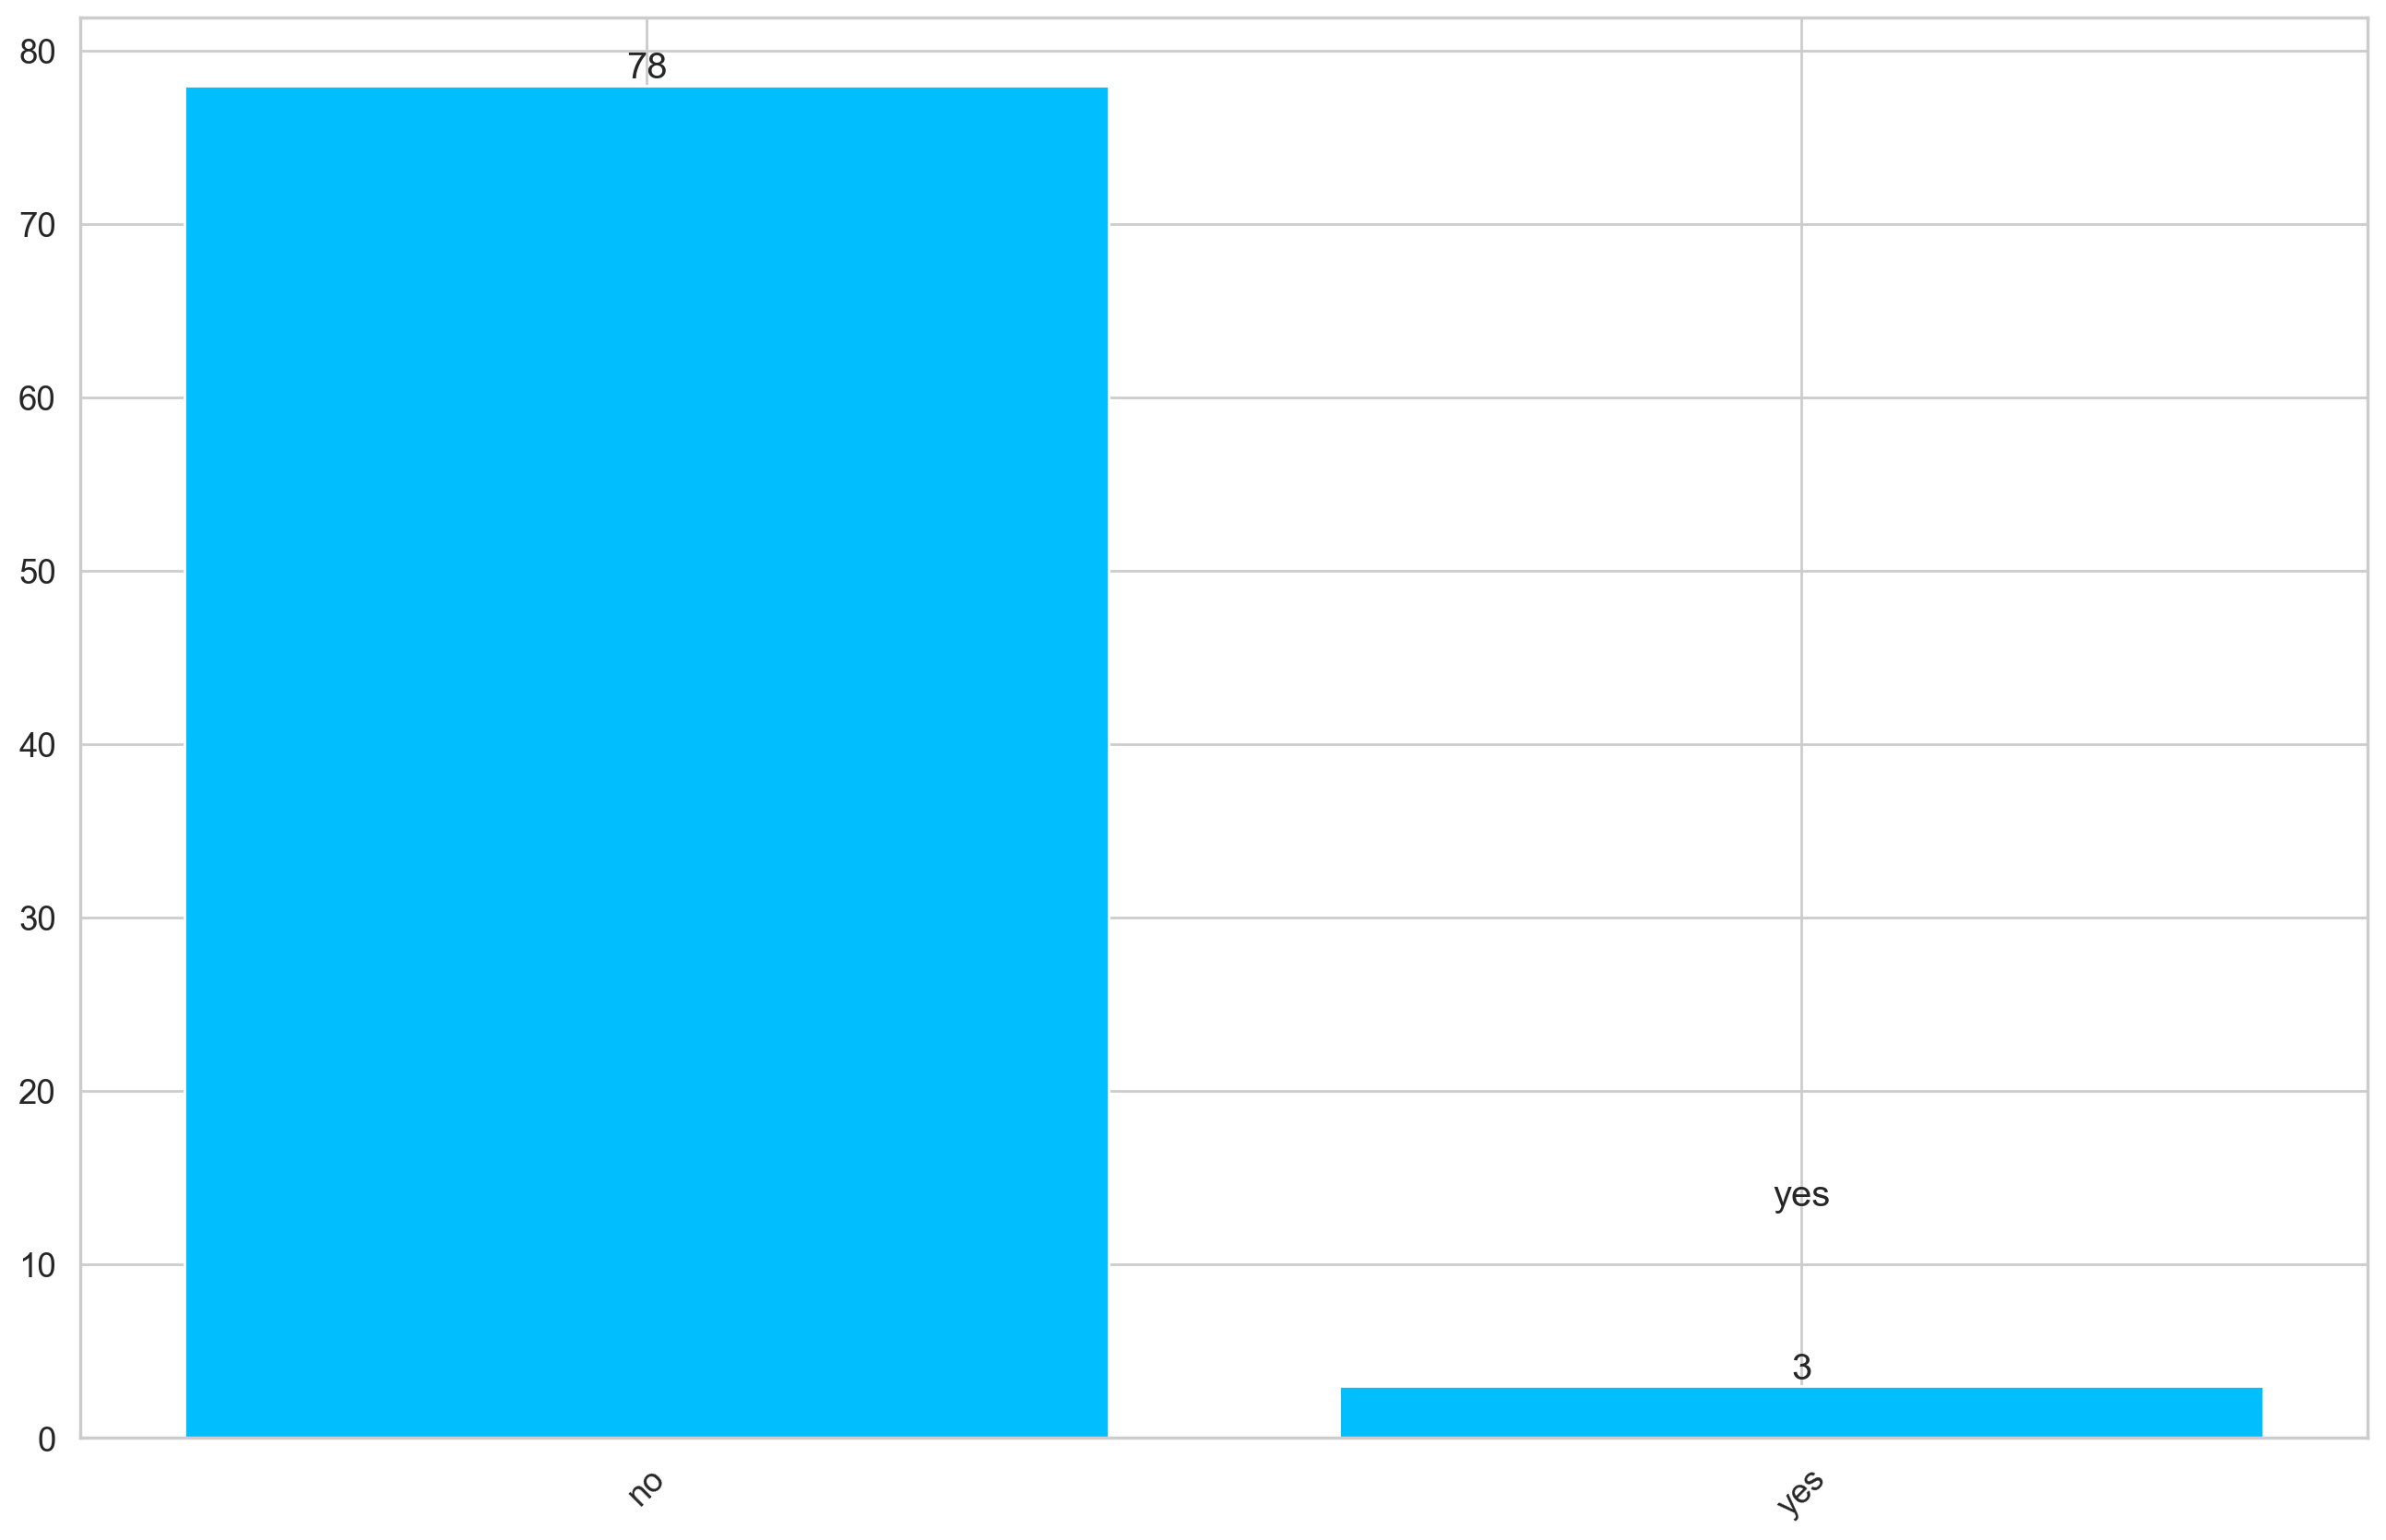

In [45]:
# Count occurrences of 0s and 1s
value_counts = np.bincount(merged_Y1)  # Count occurrences of 0s and 1s

# Create a bar plot
plt.bar(range(len(value_counts)), value_counts)

# Map 0 to "no" and 1 to "yes" for labeling
label_mapping = {0: 'no', 1: 'yes'}

# Add labels to the bars with mapped values
for i, count in enumerate(value_counts):
    label = label_mapping.get(i, str(i))  # Use the mapped label or the original value if not found in the mapping
    plt.annotate(str(count), (i, count), ha='center', va='bottom')
    plt.annotate(label, (i, count + 10), ha='center', va='bottom')  # Add labels above the bars

# Set x-axis labels and rotate them if needed
plt.xticks(range(len(value_counts)), [label_mapping.get(i, str(i)) for i in range(len(value_counts))], rotation=45)

# Show the plot
plt.show()

### Convert X data to stddev and mean statistics

In [46]:
svm_X_train = []
for l in X_custom_np1:
    # Calculate the mean
    mean_value = np.mean(l)
    # Calculate the standard deviation
    stddev_value = np.std(l)
    # Calculate the median
    median_value = np.median(l)
    svm_X_train.append([mean_value, stddev_value, median_value])

svm_X_train = np.vstack(svm_X_train)
svm_X_train

array([[5.19886035e-03, 6.41127785e-03, 2.17066400e-03],
       [3.50296515e-05, 4.31988667e-05, 1.46258500e-05],
       [5.55940338e-02, 9.25470234e-02, 5.67104500e-07],
       [9.17041409e-02, 4.44759014e-02, 8.69827760e-02],
       [4.81111775e-03, 5.93311030e-03, 2.00877100e-03],
       [3.24170055e-05, 3.99768779e-05, 1.35350000e-05],
       [2.18424375e-07, 2.69362743e-07, 9.11981500e-08],
       [1.47173171e-09, 1.81495250e-09, 6.14487500e-10],
       [9.91644595e-12, 1.22290386e-11, 4.14039000e-12],
       [6.68166060e-14, 8.23988511e-14, 2.78977000e-14],
       [1.54726708e-01, 6.94513414e-02, 1.55796986e-01],
       [1.08142653e-02, 1.33362419e-02, 4.51524650e-03],
       [7.28659600e-05, 8.98589749e-05, 3.04234500e-05],
       [4.90966345e-07, 6.05463346e-07, 2.04992000e-07],
       [3.30811040e-09, 4.07958910e-09, 1.38122500e-09],
       [4.57828620e-02, 3.08211118e-02, 4.19293510e-02],
       [1.21200271e-01, 1.53522164e-01, 6.00030000e-02],
       [9.97802968e-02, 7.31255

# Train model on Vlad's data and save

In [49]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(svm_X_train, merged_Y1)

SVC(kernel='linear')

# Load and test model on Lior's data

In [51]:
# Specify the directory and filename where you want to save the model
save_directory = './model/'
model_filename = 'svm_vlad_model.pkl'

# Combine the directory and filename to create the full file path
full_model_path = os.path.join(save_directory, model_filename)

# Save the trained model to the specified directory
joblib.dump(svm_classifier, full_model_path)

['./model/svm_vlad_model.pkl']

In [52]:
# RBF kernel
svm_classifier_rbf = SVC()
svm_classifier_rbf.fit(svm_X_train, merged_Y1)

SVC()

In [53]:
# Specify the directory and filename where you want to save the model
save_directory = './model/'
model_filename = 'svm_rbf_vlad_model.pkl'

# Combine the directory and filename to create the full file path
full_model_path = os.path.join(save_directory, model_filename)

# Save the trained model to the specified directory
joblib.dump(svm_classifier_rbf, full_model_path)

['./model/svm_rbf_vlad_model.pkl']

In [54]:
# Sigmoid kernel
svm_classifier_sig = SVC(kernel='sigmoid')
svm_classifier_sig.fit(svm_X_train, merged_Y1)

SVC(kernel='sigmoid')

In [55]:
# Specify the directory and filename where you want to save the model
save_directory = './model/'
model_filename = 'svm_sig_vlad_model.pkl'

# Combine the directory and filename to create the full file path
full_model_path = os.path.join(save_directory, model_filename)

# Save the trained model to the specified directory
joblib.dump(svm_classifier_rbf, full_model_path)

['./model/svm_sig_vlad_model.pkl']

# Load and test model on Vlad's data

## Orginaize data for testing

### Lior's 1st experiment

In [56]:
test_data = pd.read_csv("test_data/EDA_lior_1_results.csv")
# Take segments 6 to 47
test_data = test_data[120:]
test_data.head()

,Time rel [s],Day rel [d],Time rel [hh:mm:ss],Date abs [yyyy-mm-dd],Time abs [hh:mm:ss],ActivityClass [],Altitude [m],BodyPosition [],EdaArousalMean [],EdaSclMean [uS],...,InclinationRight [deg],MovementAcceleration [g],NonWearTime [],StepCount [steps],TempMean [],VerticalSpeed [m/s],temp [Grad Celsius],Marker,Segment id,Unnamed: 26
120,120,0,00:02:00,2023-07-11,18:47:49,2,107.486126,5,0.732626,6.388704,...,95.632838,0.009511,0,0,29.2,-0.000696,29.2,NaN,6,NaN
121,121,0,00:02:01,2023-07-11,18:47:50,2,107.511760,5,0.570570,6.687354,...,95.632838,0.007989,0,0,29.2,-0.001425,29.2,NaN,6,NaN
122,122,0,00:02:02,2023-07-11,18:47:51,2,107.557756,5,0.444360,6.989779,...,95.632838,0.003530,0,0,29.2,-0.001507,29.2,NaN,6,NaN
123,123,0,00:02:03,2023-07-11,18:47:52,2,107.629037,5,0.346068,7.145787,...,95.632838,0.003822,0,0,29.2,-0.000685,29.2,NaN,6,NaN
124,124,0,00:02:04,2023-07-11,18:47:53,2,107.723253,5,0.269518,7.146281,...,60.384142,0.003670,0,0,29.2,0.000843,29.2,NaN,6,NaN


In [57]:
Y_test = pd.read_csv("test_data/EDA_lior_1.csv")
# Take segments 6 to 47
Y_test = Y_test[6:]
Y_test

,Segment id,label
6,6,no
7,7,no
8,8,no
9,9,no
10,10,no
11,11,no
12,12,no
13,13,no
14,14,no
15,15,no


In [58]:
# Get the real labels of the testing data
test_encoded_labels = label_encoder.fit_transform(Y_test.label)
test_encoded_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [59]:
Y_test["encoded_label"] = test_encoded_labels
Y_test

,Segment id,label,encoded_label
6,6,no,0
7,7,no,0
8,8,no,0
9,9,no,0
10,10,no,0
11,11,no,0
12,12,no,0
13,13,no,0
14,14,no,0
15,15,no,0


In [60]:
# Extract the measuremens columns as time series data
X_test = test_data.groupby('Segment id')['EdaArousalMean []'].apply(list).values
X_test_np = np.vstack(X_test)
X_test_np

array([[7.32626147e-01, 5.70569817e-01, 4.44360220e-01, 3.46068088e-01,
        2.69518098e-01, 2.09900905e-01, 1.77399313e-01, 4.05005437e-01,
        7.50036689e-01, 9.55810487e-01, 7.44385956e-01, 5.79728365e-01,
        4.51492905e-01, 3.51623028e-01, 2.73844289e-01, 2.13270147e-01,
        1.66094957e-01, 1.29354883e-01, 1.00741684e-01, 7.84577020e-02],
       [6.11029200e-02, 1.63063374e-01, 1.13503166e+00, 9.80113315e-01,
        7.64270813e-01, 5.95214708e-01, 4.63553681e-01, 3.61015969e-01,
        2.81159520e-01, 2.18967254e-01, 1.70531869e-01, 1.32810353e-01,
        1.03432807e-01, 8.05535510e-02, 6.27351690e-02, 4.88581980e-02,
        3.80508030e-02, 2.96339950e-02, 2.30789790e-02, 1.79739270e-02],
       [1.39981080e-02, 1.09017380e-02, 8.49028200e-03, 6.61223800e-03,
        5.14961600e-03, 4.01052500e-03, 3.12340000e-03, 2.43250600e-03,
        1.89443800e-03, 1.47539000e-03, 1.14903500e-03, 8.94869000e-04,
        6.96925000e-04, 5.42766000e-04, 4.22706000e-04, 3.2920

In [61]:
svm_X_test = []
for l in X_test_np:
    # Calculate the mean
    mean_value = np.mean(l)
    # Calculate the standard deviation
    stddev_value = np.std(l)
    # Calculate the median
    median_value = np.median(l)
    svm_X_test.append([mean_value, stddev_value, median_value])

svm_X_test = np.vstack(svm_X_test)
svm_X_test

array([[3.97514456e-01, 2.45587245e-01, 3.48845558e-01],
       [2.86557643e-01, 3.25649378e-01, 1.47936864e-01],
       [3.14282070e-03, 3.87575268e-03, 1.31221250e-03],
       [2.11761542e-05, 2.61146127e-05, 8.84161500e-06],
       [1.42683825e-07, 1.75958849e-07, 5.95743500e-08],
       [9.61396355e-10, 1.18560181e-09, 4.01408500e-10],
       [6.47784280e-12, 7.98853426e-12, 2.70467000e-12],
       [1.22051719e-01, 1.10276211e-01, 1.11978516e-01],
       [5.42839643e-02, 4.69896256e-02, 3.95402200e-02],
       [1.20256739e-01, 1.07775620e-01, 1.13307581e-01],
       [7.20336125e-02, 5.50312836e-02, 5.15071475e-02],
       [1.43290399e-01, 1.56916100e-01, 8.00423910e-02],
       [1.19107731e-01, 7.44662471e-02, 1.05774865e-01],
       [2.99213867e-02, 2.96072796e-02, 1.76632365e-02],
       [2.85044985e-04, 3.51519879e-04, 1.19014000e-04],
       [1.47064078e-02, 1.70035579e-02, 6.68249550e-03],
       [2.28298199e-04, 2.81539218e-04, 9.53206500e-05],
       [1.53826183e-06, 1.89699

In [62]:
test_data1 = pd.read_csv("test_data/EDA_lior_2_results.csv")
# Take segments 5 to 47
test_data1 = test_data1[100:960]
test_data1

,Time rel [s],Day rel [d],Time rel [hh:mm:ss],Date abs [yyyy-mm-dd],Time abs [hh:mm:ss],ActivityClass [],Altitude [m],BodyPosition [],EdaArousalMean [],EdaSclMean [uS],...,InclinationRight [deg],MovementAcceleration [g],NonWearTime [],StepCount [steps],TempMean [],VerticalSpeed [m/s],temp [Grad Celsius],Marker,Segment id,Unnamed: 26
100,100,0,00:01:40,2023-07-11,19:14:34,0.0,109.181945,0,0.219539,6.287830,...,97.602633,0.177910,0.0,0.0,29.4,-0.036872,29.4,NaN,5.0,NaN
101,101,0,00:01:41,2023-07-11,19:14:35,0.0,109.018117,0,0.172122,6.368778,...,97.602633,0.346009,0.0,0.0,29.4,-0.034635,29.4,NaN,5.0,NaN
102,102,0,00:01:42,2023-07-11,19:14:36,0.0,108.845850,0,0.134049,6.449124,...,97.602633,0.163379,0.0,0.0,29.4,-0.030700,29.4,NaN,5.0,NaN
103,103,0,00:01:43,2023-07-11,19:14:37,0.0,108.709690,0,0.104397,6.496478,...,97.602633,0.200110,0.0,0.0,29.5,-0.024966,29.5,NaN,5.0,NaN
104,104,0,00:01:44,2023-07-11,19:14:38,0.0,108.624707,0,0.081305,6.510152,...,110.920292,0.058747,0.0,0.0,29.5,-0.018029,29.5,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,955,0,00:15:55,2023-07-11,19:28:49,1.0,109.797062,4,0.002364,0.000558,...,178.858151,0.006886,0.0,0.0,30.4,0.012499,30.4,NaN,47.0,NaN
956,956,0,00:15:56,2023-07-11,19:28:50,1.0,109.769814,4,0.001841,-0.000035,...,178.846979,0.002802,0.0,0.0,30.4,0.007517,30.4,NaN,47.0,NaN
957,957,0,00:15:57,2023-07-11,19:28:51,1.0,109.739171,4,0.001434,-0.000270,...,178.846979,0.002065,0.0,0.0,30.4,0.006026,30.4,NaN,47.0,NaN
958,958,0,00:15:58,2023-07-11,19:28:52,1.0,109.716295,4,0.001117,-0.000298,...,178.846979,0.001927,0.0,0.0,30.4,0.009413,30.4,NaN,47.0,NaN


In [63]:
Y_test1 = pd.read_csv("test_data/EDA_lior_2.csv")
# Take segments 5 to 47
Y_test1 = Y_test1[5:]
Y_test1

,Segment id,label
5,5,no
6,6,no
7,7,no
8,8,no
9,9,no
10,10,no
11,11,no
12,12,no
13,13,no
14,14,yes


In [64]:
# Get the real labels of the testing data
test_encoded_labels1 = label_encoder.fit_transform(Y_test1.label)
test_encoded_labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
Y_test1["encoded_label"] = test_encoded_labels1
Y_test1

,Segment id,label,encoded_label
5,5,no,0
6,6,no,0
7,7,no,0
8,8,no,0
9,9,no,0
10,10,no,0
11,11,no,0
12,12,no,0
13,13,no,0
14,14,yes,1


In [66]:
# Extract the measuremens columns as time series data
X_test1 = test_data1.groupby('Segment id')['EdaArousalMean []'].apply(list).values
X_test_np1 = np.vstack(X_test1)
X_test_np1


array([[2.19538958e-01, 1.72122288e-01, 1.34048973e-01, 1.04397445e-01,
        8.13048120e-02, 6.33202510e-02, 4.93138610e-02, 3.84056740e-02,
        2.99103690e-02, 2.32942190e-02, 1.81415560e-02, 1.41286580e-02,
        1.10034100e-02, 8.56946400e-03, 6.67390500e-03, 5.19764300e-03,
        4.04792800e-03, 3.15253000e-03, 2.45519300e-03, 1.91210600e-03],
       [1.48915000e-03, 1.15975100e-03, 9.03215000e-04, 7.03424000e-04,
        5.47828000e-04, 4.26648000e-04, 3.32274000e-04, 2.58775000e-04,
        2.01534000e-04, 1.56955000e-04, 1.22237000e-04, 9.51981000e-05,
        7.41404000e-05, 5.77406000e-05, 3.78316460e-01, 3.52290196e-01,
        2.74363880e-01, 2.13674805e-01, 1.66410105e-01, 1.29600320e-01],
       [1.00932831e-01, 7.86065680e-02, 6.12188570e-02, 4.76772930e-02,
        3.71311130e-02, 2.89177400e-02, 2.25211590e-02, 1.75394960e-02,
        1.36597730e-02, 1.06382420e-02, 8.28507100e-03, 6.45242000e-03,
        5.02515000e-03, 3.91359100e-03, 3.04790700e-03, 2.3737

In [67]:
svm_X_test1 = []
for l in X_test_np1:
    # Calculate the mean
    mean_value = np.mean(l)
    # Calculate the standard deviation
    stddev_value = np.std(l)
    # Calculate the median
    median_value = np.median(l)
    svm_X_test1.append([mean_value, stddev_value, median_value])

svm_X_test1 = np.vstack(svm_X_test1)
svm_X_test1


array([[4.95469622e-02, 6.09869664e-02, 2.07178875e-02],
       [7.60592318e-02, 1.25888492e-01, 6.25626000e-04],
       [2.26611902e-02, 2.79459683e-02, 9.46165650e-03],
       [1.52689819e-04, 1.88298408e-04, 6.37521500e-05],
       [1.02881611e-06, 1.26874430e-06, 4.29558500e-07],
       [6.93211010e-09, 8.54873635e-09, 2.89434000e-09],
       [4.67081565e-11, 5.76008685e-11, 1.95019500e-11],
       [3.14717250e-13, 3.88111769e-13, 1.31403000e-13],
       [2.12054887e-15, 2.61507808e-15, 8.85386500e-16],
       [1.52671454e-01, 1.50842146e-01, 8.82811725e-02],
       [1.02721102e-01, 2.12455841e-01, 2.66586050e-03],
       [9.64010789e-02, 1.18882612e-01, 4.02500445e-02],
       [5.91261011e-02, 1.35315642e-01, 7.37205500e-04],
       [9.03147239e-02, 9.31837820e-02, 4.64184840e-02],
       [3.98491449e-02, 7.13198366e-02, 1.09165800e-03],
       [1.62522741e-02, 2.00424395e-02, 6.78576200e-03],
       [8.22007177e-02, 7.53263267e-02, 5.19791045e-02],
       [8.75196670e-02, 1.10459

# Test linear SVM

## Test Lior model on Vlad experiment 1

In [68]:
loaded_clf = joblib.load("./model/svm_vlad_model.pkl")

In [69]:
# Predict labels for the test data
y_pred = loaded_clf.predict(svm_X_test)
# Print predictions
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [70]:
# Calculate accuracy of the model on Vlad's 2nd experiment data
accuracy = accuracy_score(test_encoded_labels, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
report = classification_report(test_encoded_labels, y_pred)
print(report)

Accuracy: 92.86%
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       0.00      0.00      0.00         3

    accuracy                           0.93        42
   macro avg       0.46      0.50      0.48        42
weighted avg       0.86      0.93      0.89        42



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Test Vlad model on Lior experiment 2

In [71]:
# Predict labels for the test data
y_pred1 = loaded_clf.predict(svm_X_test1)
# Print predictions
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
# Calculate accuracy of the model on Vlad's 2nd experiment data
accuracy = accuracy_score(test_encoded_labels1, y_pred1)
print(f"Accuracy: {accuracy * 100:.2f}%")
report = classification_report(test_encoded_labels1, y_pred1)
print(report)

Accuracy: 93.02%
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       0.00      0.00      0.00         3

    accuracy                           0.93        43
   macro avg       0.47      0.50      0.48        43
weighted avg       0.87      0.93      0.90        43



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Test rbf SVM

## Test Vlad model on Lior experiment 1

In [73]:
loaded_clf1 = joblib.load("./model/svm_rbf_vlad_model.pkl")

In [74]:
# Predict labels for the test data
y_pred = loaded_clf1.predict(svm_X_test)
# Print predictions
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [75]:
# Calculate accuracy of the model on Vlad's 2nd experiment data
accuracy = accuracy_score(test_encoded_labels, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
report = classification_report(test_encoded_labels, y_pred)
print(report)

Accuracy: 92.86%
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       0.00      0.00      0.00         3

    accuracy                           0.93        42
   macro avg       0.46      0.50      0.48        42
weighted avg       0.86      0.93      0.89        42



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Test Vlad model on Lior experiment 2

In [76]:
# Predict labels for the test data
y_pred1 = loaded_clf1.predict(svm_X_test1)
# Print predictions
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [77]:
# Calculate accuracy of the model on Vlad's 2nd experiment data
accuracy = accuracy_score(test_encoded_labels1, y_pred1)
print(f"Accuracy: {accuracy * 100:.2f}%")
report = classification_report(test_encoded_labels1, y_pred1)
print(report)

Accuracy: 93.02%
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       0.00      0.00      0.00         3

    accuracy                           0.93        43
   macro avg       0.47      0.50      0.48        43
weighted avg       0.87      0.93      0.90        43



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Test sigmoid SVM

## Test Vlad model on Lior experiment 1

In [78]:
loaded_clf2 = joblib.load("./model/svm_sig_vlad_model.pkl")

In [79]:
# Predict labels for the test data
y_pred1 = loaded_clf2.predict(svm_X_test1)
y_pred = loaded_clf2.predict(svm_X_test)

# Print predictions
print(y_pred)
print(y_pred1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
